# Data Cleaning And Exploration

The data I'm using in this notebook is a heart disease dataset I found on Kaggle (link to the dataset : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset ).

** Note that I changed the dataset a bit.

The description of the dataset is below:

### About Dataset  
Context  

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Content 
Attribute Information: 

-age  
-sex  
-chest pain type (4 values)  
-resting blood pressure  
-serum cholestoral in mg/dl  
-fasting blood sugar > 120 mg/dl  
-resting electrocardiographic results (values 0,1,2)  
-maximum heart rate achieved  
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest  
-the slope of the peak exercise ST segment  
-number of major vessels (0-3) colored by flourosopy  
-thal: 0 = normal; 1 = fixed defect; 2 = reversable defect  
-The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

First, we can look at the dataset in a pandas dataframe format. Then I want to check if this dataset contains any duplicate or null values. 

In [105]:
import pandas as pd
data = pd.read_csv(r'heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0.0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1.0,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1.0,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0.0,2,1


In [106]:
pd.isnull(data).sum().to_frame()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


we can see that in 'ca' column there is one null values. there are different ways that we could deal with this, we can either delete the whole row, or we can replace it with some data. So to avoid deleting the whole row, we can look at the data in that column and see what the values are.

In [107]:
data['ca'].unique()

array([ 2.,  0.,  1.,  3., nan,  4.])

we can see that there are only 5 different values it can be, so we can 
simply replace it by one of these values (for instance 0) or we can calculate the average of all the values  in that column and round it up and then use it as a replacement value. I prefer the second option.

In [108]:
#pd.dropna()   => to delete the row that has null value in it

ca_avg = data['ca'].mean()
print(ca_avg)
ca_avg_round = round(ca_avg)
print(ca_avg_round)

0.7548828125
1


Now that we can replace that particular value with the average value.

In [109]:
data = data.fillna(ca_avg_round)
pd.isna(data).sum().to_frame()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Now it's time to deal with the duplicates. First we need to see if there are any duplicates in the dataset.

In [110]:
data.duplicated().sum()

721

So 722 rows are duplicate. So we can delete those rows to have a clean data.

In [111]:
data = data.drop_duplicates()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0.0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0.0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1.0,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0.0,2,0


We can see that now there are only 303 rows left.
finally, we can look at the values in each and every column to check if there is any misfits.

In [112]:
print('age: ', data['age'].unique()) 
print('sex: ', data['sex'].unique()) 
print('cp: ', data['cp'].unique()) 
print('trestbps: ', data['trestbps'].unique()) 
print('chol: ', data['chol'].unique()) 
print('fbs: ', data['fbs'].unique()) 
print('restecg: ', data['restecg'].unique()) 
print('thalach: ', data['thalach'].unique()) 
print('exang: ', data['exang'].unique()) 
print('oldpeak: ', data['oldpeak'].unique()) 
print('slope: ', data['slope'].unique()) 
print('ca: ', data['ca'].unique()) 
print('thal: ', data['thal'].unique()) 
print('target:  ', data['target'].unique()) 


age:  [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex:  [1 0]
cp:  [0 1 2 3]
trestbps:  [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol:  [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs: 

We see that in 'oldpeak' column, there is an outlier which is 404. perhapse the
data was supposed to be 4.4 but it turned into 404 as a result of a typo.
So we can find that particular value and replace it with the right one.

In [117]:
data.loc[data['oldpeak']== 404] = 4.4
data['oldpeak'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

Now we can see that there is not an outlier in this column anymore.

# Data Visualization

Now, if we want to get a sense of age of the patients, we can visualize it using line or scatter plot.

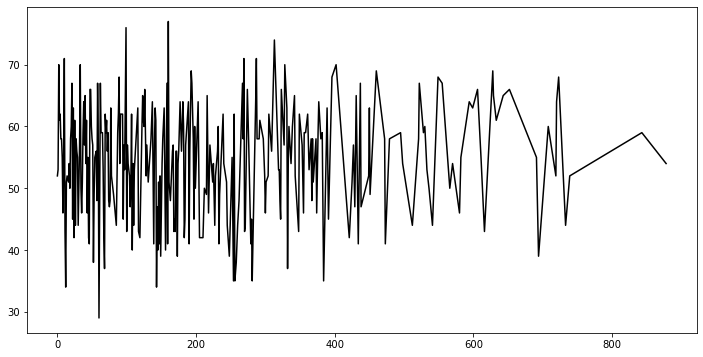

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data['age'], color = 'black')

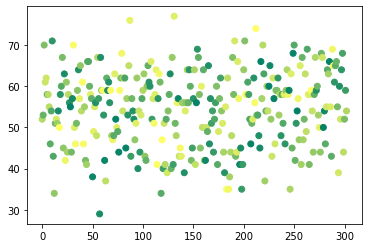

In [93]:
import numpy as np
colors = np.random.rand(303)
plt.scatter(range(len(data)), data['age'], c = colors, cmap = 'summer')

we can see that this type of plotting is not useful, so we need to seperate the data and turn it into three different age groups including young, middle aged and old.

In [94]:
young = data.loc[data['age'] <= 45]
young

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
11,43,0,0,132,341,1,0,136,1,3.0,1,0.0,3,0
12,34,0,1,118,210,0,1,192,0,0.7,2,0.0,2,1
22,45,1,0,104,208,0,0,148,1,3.0,1,0.0,2,1
24,42,0,2,120,209,0,1,173,0,0.0,1,0.0,2,1
26,44,1,2,130,233,0,1,179,1,0.4,2,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,44,1,0,112,290,0,0,153,0,0.0,2,1.0,2,0
541,44,1,2,140,235,0,0,180,0,0.0,2,0.0,2,1
616,43,1,0,115,303,0,1,181,0,1.2,1,0.0,2,1
694,39,1,0,118,219,0,1,140,0,1.2,1,0.0,3,0


In [95]:
middle_aged = data.loc[(45<data['age']) & (data['age']<65) ]
middle_aged

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,52,1,0,108,233,1,1,147,0,0.1,2,3.0,3,1
720,64,1,2,140,335,0,1,158,0,0.0,2,0.0,2,0
739,52,1,0,128,255,0,1,161,1,0.0,2,1.0,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0.0,2,0


In [96]:
old = data.loc[data['age']>=65]
old

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3,0
10,71,0,0,112,149,0,1,125,0,1.6,1,0.0,2,1
21,67,0,0,106,223,0,1,142,0,0.3,2,2.0,2,1
33,70,1,2,160,269,0,1,112,1,2.9,1,1.0,3,0
40,65,0,2,160,360,0,0,151,0,0.8,2,0.0,2,1
47,66,0,0,178,228,1,1,165,1,1.0,1,2.0,3,0
48,66,0,2,146,278,0,0,152,0,0.0,1,1.0,2,1
58,67,1,2,152,212,0,0,150,0,0.8,1,0.0,3,0
62,67,1,0,100,299,0,0,125,1,0.9,1,2.0,2,0
89,68,1,0,144,193,1,1,141,0,3.4,1,2.0,3,0


Now that we have the age groups, we can concatenate them all to see the output just like the input but with an extra column.

In [97]:
young.loc[:,'age_bracket'] = 'young'
middle_aged.loc[:,'age_bracket'] = 'middle_aged'
old.loc[:,'age_bracket'] = 'old'

a = pd.concat([young,middle_aged,old])
a

C:\Users\RAYAN\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\RAYAN\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bracket
11,43,0,0,132,341,1,0,136,1,3.0,1,0.0,3,0,young
12,34,0,1,118,210,0,1,192,0,0.7,2,0.0,2,1,young
22,45,1,0,104,208,0,0,148,1,3.0,1,0.0,2,1,young
24,42,0,2,120,209,0,1,173,0,0.0,1,0.0,2,1,young
26,44,1,2,130,233,0,1,179,1,0.4,2,0.0,2,1,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,69,0,3,140,239,0,1,151,0,1.8,2,2.0,2,1,old
629,65,1,3,138,282,1,0,174,0,1.4,1,1.0,2,0,old
643,65,1,0,120,177,0,1,140,0,0.4,2,0.0,3,1,old
652,66,0,3,150,226,0,1,114,0,2.6,0,0.0,2,1,old


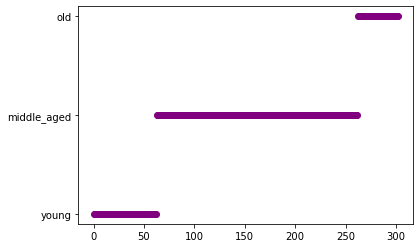

In [98]:
plt.scatter(range(len(a['age_bracket'])),a['age_bracket'], c ='purple')

So this way we can see the data so much better and it actually gives us som useful info. We can see that most of the 
patients are middle aged, this is an insight that we could get using brackets and visualization.

Now to get some more insights we can draw more plots. 

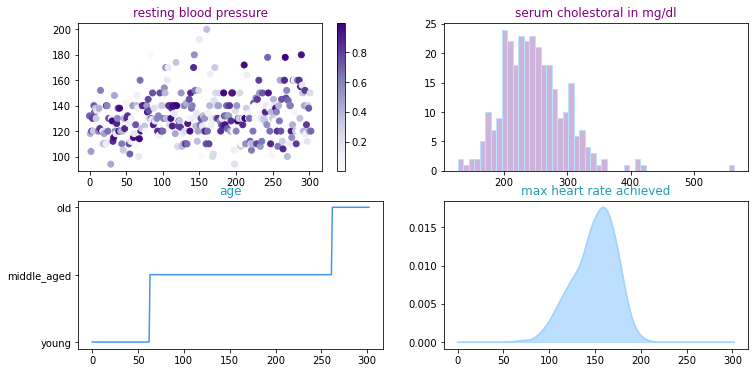

In [119]:
from scipy import stats

plt.figure(figsize= (12,6))
values = range(len(a['thalach']))

plt.subplot(2,2,1)
plt.title('resting blood pressure', fontsize = 12, color = 'purple')
plt.scatter(values, a['trestbps'], c=colors, cmap = 'Purples' )
plt.colorbar()

plt.subplot(2,2,2)
plt.title('serum cholestoral in mg/dl',fontsize = 12, color = 'purple')
plt.hist(a['chol'], bins = 50, color = '#cdb4db', edgecolor= '#bde0fe')


plt.subplot(2,2,3)
plt.title('age',fontsize = 12, color = '#219ebc')
plt.plot(values, a['age_bracket'], color = '#4895ef')

plt.subplot(2,2,4)
plt.title('max heart rate achieved',fontsize = 12, color = '#219ebc')
density = stats.kde.gaussian_kde(a['thalach'])
plt.plot(values,density(values), color = '#a2d2ff')
plt.fill_between(values, density(values), alpha = 0.7, color = '#a2d2ff')

plt.show()